In [24]:
import pickle
import plot
import numpy as np
from matplotlib import pyplot as plt

load Feature Vectors

In [2]:
import glob

In [10]:
folder    = "../features/"
file_paths = glob.glob(folder + "*")

In [17]:
features = []
for file_path in file_paths:
    with open(file_path, 'rb') as input:
        features.append(pickle.load(input))

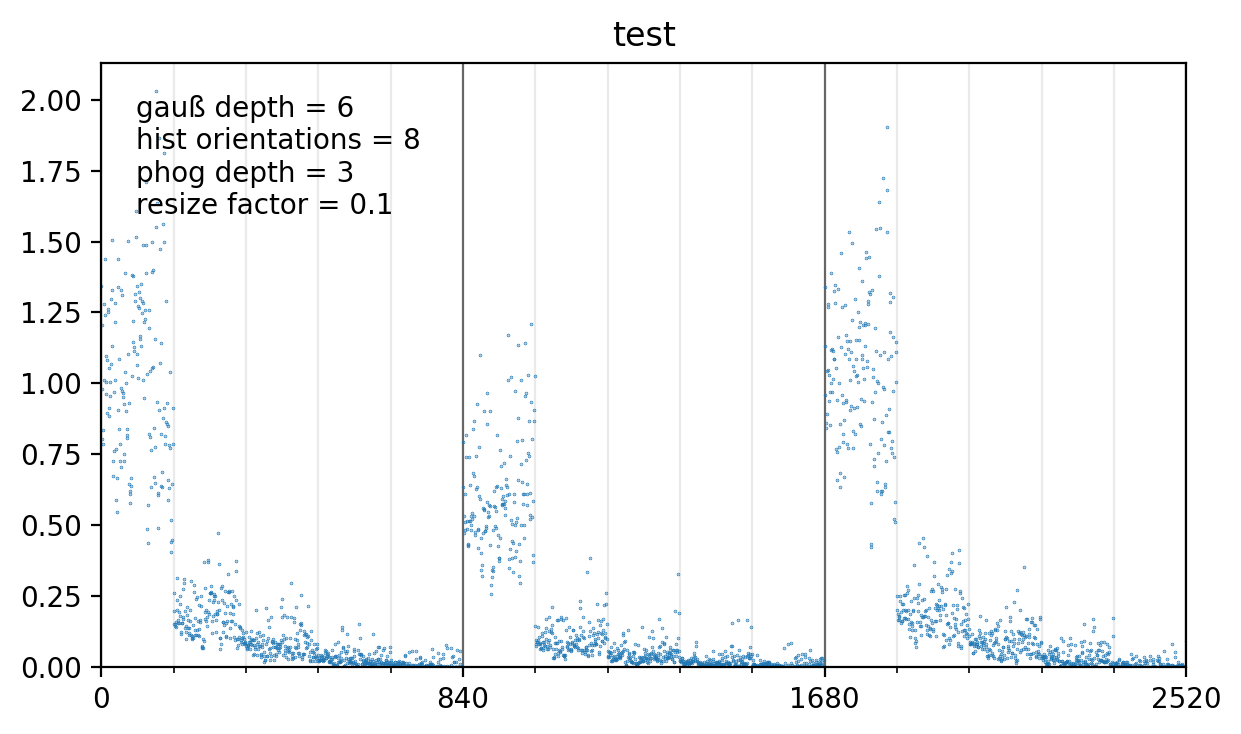

In [19]:
feature = features[0]
plot.plot_vector(vector=feature[1], name="test", parameter=feature[0])

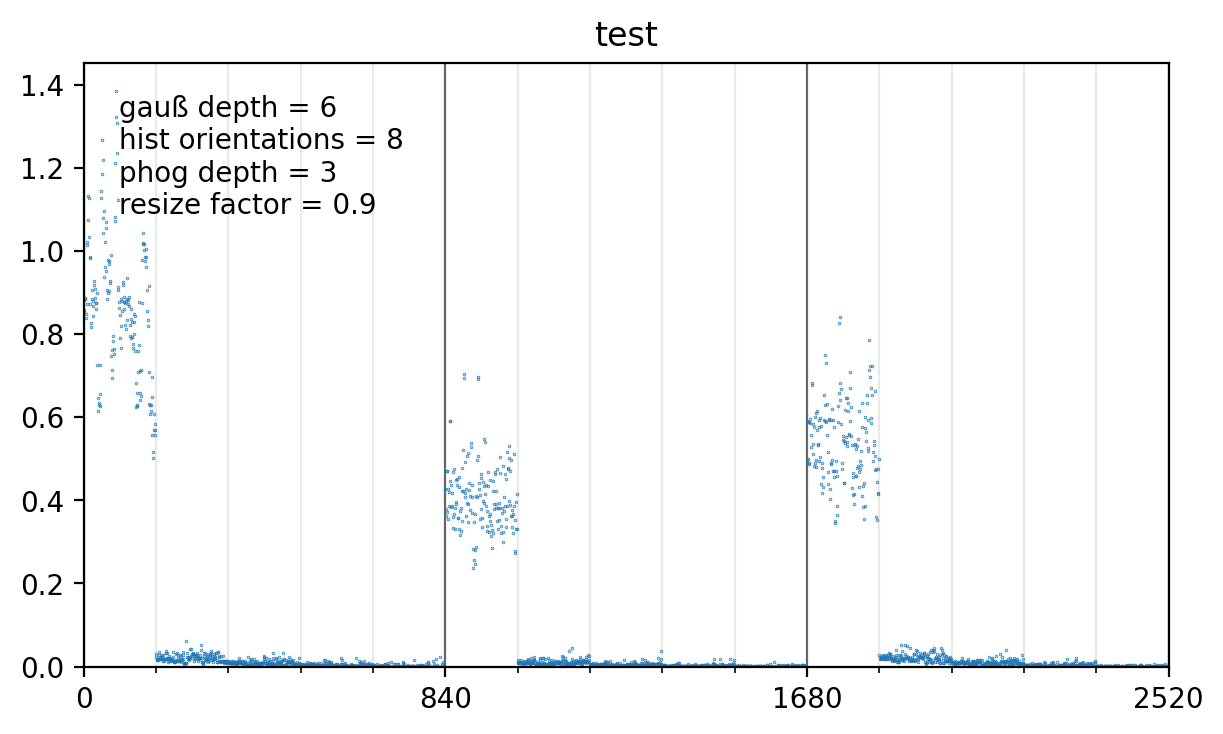

In [20]:
feature = features[-1]
plot.plot_vector(vector=feature[1], name="test", parameter=feature[0])

In [71]:
normals = []

for f in features:

    vector = f[1]

    normal = np.concatenate([v / v.max() for v in np.split(vector, 5*3)])
    normals.append(normal)

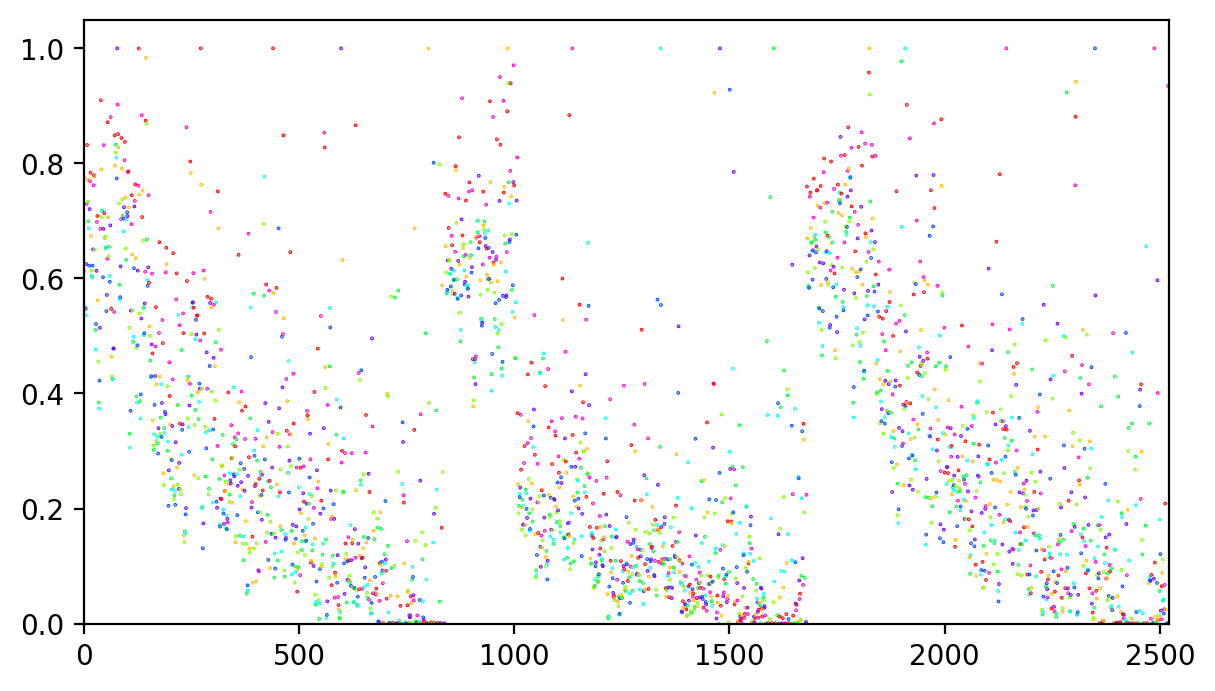

In [74]:
plot.testplot(normals[2])

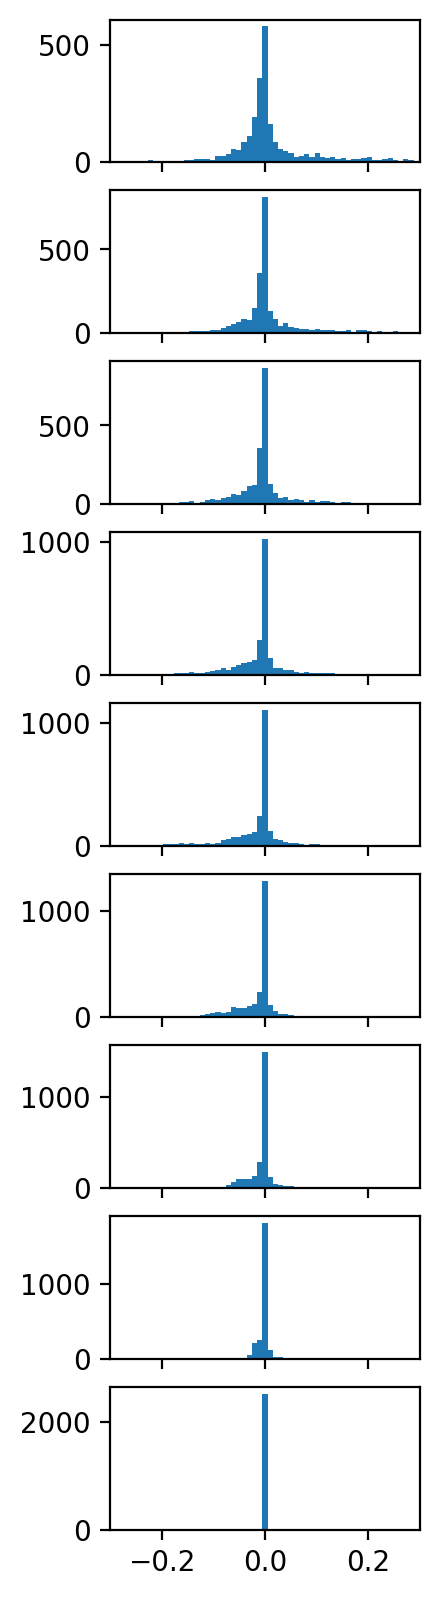

In [109]:
fig, axs = plt.subplots(len(normals), 1, dpi=200, figsize=(2, 10), sharex='all')

for index, ax in enumerate(axs):
    ax.hist(normals[-1] - normals[index], bins=np.linspace(-0.5, 0.5, 100))
    ax.set_xlim(-0.3, 0.3)
    #ax.set_yscale('log')

In [112]:
diffs = [normals[-1] - n for n in normals]

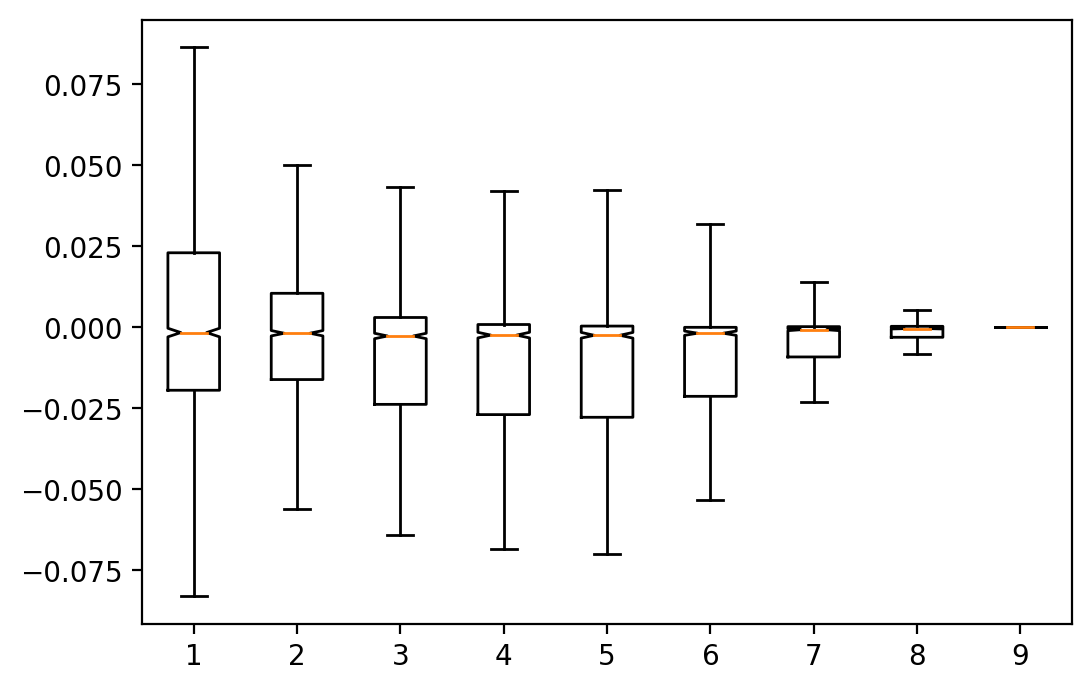

In [123]:
fig, ax = plt.subplots(dpi=200)
ax.boxplot(diffs, vert=True, autorange=True, notch=True, showfliers=False);